In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q kaggle

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
import keras
# print(keras.__version__)

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pateljay731/panama-electricity-load-forecasting

Dataset URL: https://www.kaggle.com/datasets/pateljay731/panama-electricity-load-forecasting
License(s): unknown
panama-electricity-load-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip panama-electricity-load-forecasting.zip

Archive:  panama-electricity-load-forecasting.zip
replace Predict_Jan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df=pd.read_csv('train.csv')

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten

In [ ]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
print(df.dtypes)

datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object


In [ ]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'],format='%d-%m-%Y %H:%M')

In [ ]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
#from datetime import datetime
df['week_day']=df['datetime'].dt.dayofweek
df['date']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,week_day,date,month,hour
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0.016562,0.096100,5.364148,0,0,0,5,3,1,1
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0.016509,0.087646,5.572471,0,0,0,5,3,1,2
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0.016479,0.078735,5.871184,0,0,0,5,3,1,3
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0.016487,0.068390,5.883621,0,0,0,5,3,1,4
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0.016456,0.064362,5.611724,0,0,0,5,3,1,5


<Axes: xlabel='datetime'>

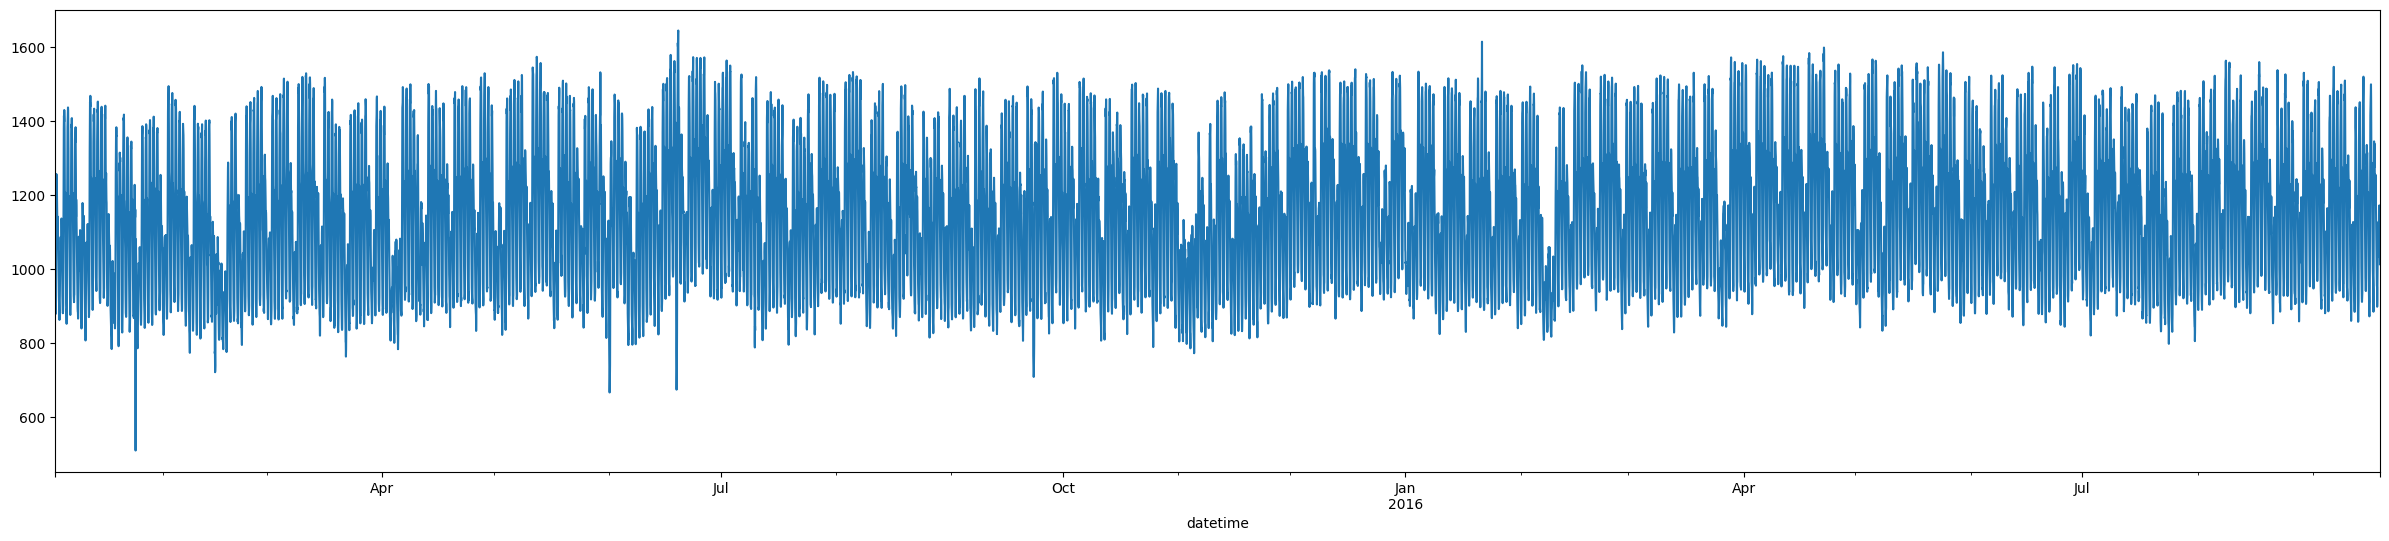

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df[0:15000]
ddd.groupby('datetime')['nat_demand'].median().plot()

In [3]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)

    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)

    df['nat_demand3']=df['nat_demand'].shift(3).fillna(0)
    df['nat_demand4']=df['nat_demand'].shift(4).fillna(0)
    df['nat_demand5']=df['nat_demand'].shift(5).fillna(0)
    df['nat_demand6']=df['nat_demand'].shift(6).fillna(0)
    df['nat_demand7']=df['nat_demand'].shift(7).fillna(0)
    df['nat_demand8']=df['nat_demand'].shift(8).fillna(0)
    df['nat_demand9']=df['nat_demand'].shift(9).fillna(0)
    df['nat_demand10']=df['nat_demand'].shift(10).fillna(0)
    df['nat_demand11']=df['nat_demand'].shift(11).fillna(0)
    df['nat_demand12']=df['nat_demand'].shift(12).fillna(0)
    df['nat_demand13']=df['nat_demand'].shift(13).fillna(0)
    df['nat_demand14']=df['nat_demand'].shift(14).fillna(0)
    df['nat_demand_n']=df['nat_demand']
    #df = pd.get_dummies(df)
    return df

In [ ]:
df1 = add_features(df)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      43775 non-null  datetime64[ns]
 1   nat_demand    43775 non-null  float64       
 2   T2M_toc       43775 non-null  float64       
 3   QV2M_toc      43775 non-null  float64       
 4   TQL_toc       43775 non-null  float64       
 5   W2M_toc       43775 non-null  float64       
 6   T2M_san       43775 non-null  float64       
 7   QV2M_san      43775 non-null  float64       
 8   TQL_san       43775 non-null  float64       
 9   W2M_san       43775 non-null  float64       
 10  T2M_dav       43775 non-null  float64       
 11  QV2M_dav      43775 non-null  float64       
 12  TQL_dav       43775 non-null  float64       
 13  W2M_dav       43775 non-null  float64       
 14  Holiday_ID    43775 non-null  int64         
 15  holiday       43775 non-null  int64 

In [ ]:
col=['datetime']
demand=df1['nat_demand']
new_df= df1.drop(columns=col)
df_for_training = new_df.astype(float)

# print(df_for_training)

In [ ]:
df_for_training.shape

(43775, 58)

In [ ]:
import joblib

In [ ]:
# joblib.dump(scaler, 'scaler.joblib')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:

X=np.array(df_for_training)

print(X)

[[9.70345000e+02 2.58652588e+01 1.85763820e-02 ... 0.00000000e+00
  0.00000000e+00 9.70345000e+02]
 [9.12175500e+02 2.58992554e+01 1.86532920e-02 ... 0.00000000e+00
  0.00000000e+00 9.12175500e+02]
 [9.00268800e+02 2.59372803e+01 1.87678600e-02 ... 0.00000000e+00
  0.00000000e+00 9.00268800e+02]
 ...
 [1.19368020e+03 2.63544556e+01 1.79797110e-02 ... 1.19453650e+03
  1.09915080e+03 1.19368020e+03]
 [1.13045750e+03 2.61668945e+01 1.79648770e-02 ... 1.24136500e+03
  1.19453650e+03 1.13045750e+03]
 [1.08447370e+03 2.59763733e+01 1.80718040e-02 ... 1.32138080e+03
  1.24136500e+03 1.08447370e+03]]


In [ ]:

trainX = []
trainY = []
trainY = df_for_training['nat_demand'].to_numpy().reshape(-1,1)
trainX = df_for_training.to_numpy().reshape(-1, 58,1)
#trainY = df[['pressure']].to_numpy().reshape(-1, 80)
#trainX = df.reshape(-1, 80, df.shape[-1])      df_for_training.shape[-1]

In [ ]:
df_for_training.shape

(43775, 58)

In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 48
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
   trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
   trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [24]:
trainX, trainY = np.array(trainX), np.array(trainY)
# print(trainX.shape)
print(trainY)

[[0.51538797]
 [0.49889148]
 [0.4904836 ]
 ...
 [0.67742589]
 [0.63878884]
 [0.61068694]]


In [25]:



# np.set_printoptions(precision=3)

# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=2000)
#p = PrintArray(precision=4, linewidth=150, suppress=True)
trainX.shape[1]


48

In [26]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True,name='L1'),name='BL1'))
                             #return_sequences=True))
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True,name='L2'),name='BL2'))
# model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Bidirectional(LSTM(24, activation='relu', return_sequences=False,name='L3'),name='BL3'))
# model.add(Dropout(0.2))
model.add(Flatten(name='f1'))
model.add(Dense(64, activation='relu',name='L4'))#, return_sequences=False))
model.add(Dense(32, activation='relu',name='L5'))#, return_sequences=False))
model.add(Dense(8, activation='relu',name='L6'))#, return_sequences=False))
model.add(Dense(trainY.shape[1],name='output'))

model.compile(optimizer='adam', loss='mse',metrics=['mse'])




#model 2

# model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# # model.add(Dropout(0.2))
# model.add(LSTM(64,return_sequences=True))
# model.add(LSTM(64))
# # model.add(LSTM(64))
# # model.add(Dropout(0.2))
# model.add(Dense(6))

# # Add Dense layers for final output
# model.add(Dense(32, activation='relu'))
# # model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
#  # Add activation for dense layer
# model.add(Dense(trainY.shape[1]))

# # Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# model.summary()

c:\Users\Aniket\OneDrive\Desktop\STLF\LSTM-Load-Forecasting\LSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# import os
# checkpoint_path="training_1/my_checkpoints"
# checkpoint_dir=os.path.dirname(checkpoint_path)

In [27]:
history = model.fit(trainX, trainY, epochs=10, batch_size=64,verbose=1,validation_split=0.2)
#validation_split=0.2,


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - loss: 1.7968 - mse: 1.7968 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.6793e-04 - val_mse: 9.6793e-04
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - loss: 7.6157e-04 - mse: 7.6157e-04 - val_loss: 7.9034e-04 - val_mse: 7.9034e-04
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - loss: 6.2901e-04 - mse: 6.2901e-04 - val_loss: 7.8280e-04 - val_mse: 7.8280e-04
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - loss: 5.1292e-04 - mse: 5.1292e-04 - val_loss: 5.3930e-04 - val_mse: 5.3930e-04
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - loss: 4.3796e-04 - mse: 4.3796e-04 - val_loss: 5.9012e-04 - val_mse: 5.9012e-04
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - loss: 4.1316e-04 - mse: 4.1316e-04 - val_loss: 4.4648e-04 - val_mse: 4.4648e-04
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - loss: 3.7896e-04

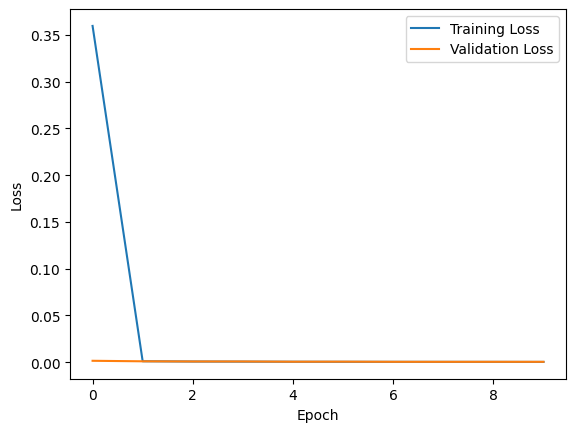

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 48, 128)             │          62,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 48, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 48)                  │          17,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,309 (1.45 MB)

 Trainable params: 126,769 (495.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,540 (990.39 KB)

In [ ]:
df_test= pd.read_csv('Test_Jan.csv',encoding="latin-1")
# print(df_test.shape)
df_test['datetime']=pd.to_datetime(df_test['datetime'],format='%d-%m-%Y %H:%M')
df_test['week_day']=df_test['datetime'].dt.dayofweek
df_test['date']=df_test['datetime'].dt.day
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour
df_test = add_features(df_test)
df_for_pred=df_test.drop(columns=col)

df_fo_testing=df_for_pred.astype(float)
df_pred_scaled=scaler.transform(df_for_pred)
# print(df_pred_scaled.shape)
X_pred = []
for i in range(n_past, len(df_pred_scaled) - n_future +1):
    X_pred.append(df_for_training_scaled[i - n_past:i, 0:df_fo_testing.shape[1]])
X_pred= np.array(X_pred)

print('X for prediction shape == {}.'.format(X_pred.shape))

X for prediction shape == (696, 48, 58).


In [ ]:
X_pred

(696, 48, 58)

22/22 [==============================] - 1s 31ms/step


<Axes: >

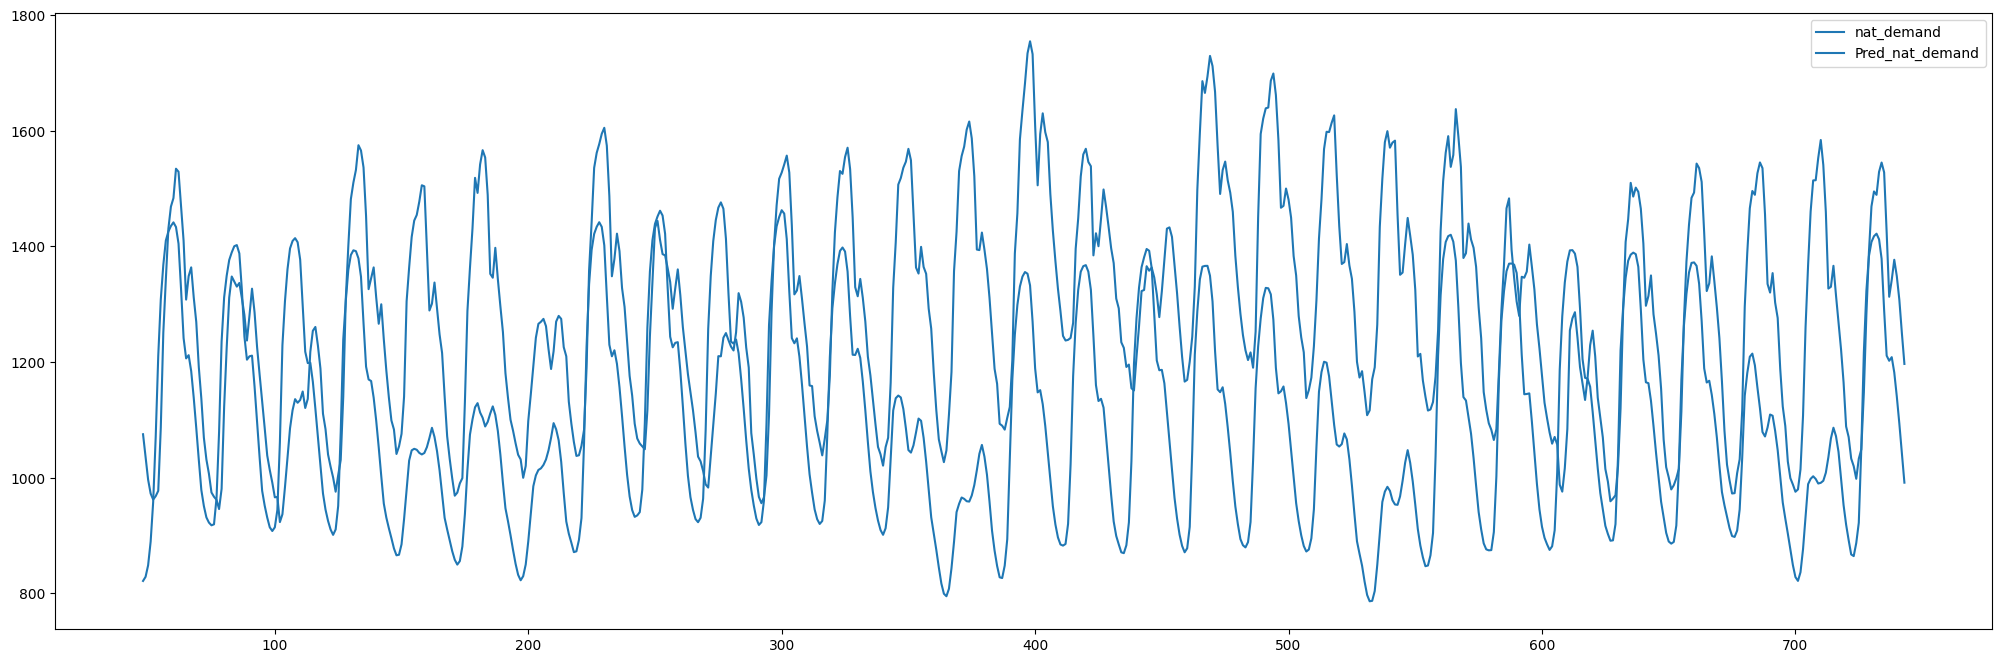

In [ ]:
prediction = model.predict(X_pred)
prediction_copies = np.repeat(prediction, df_fo_testing.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
y_pred_future
df_forecast=[]
df_forecast = pd.DataFrame(y_pred_future)
temp_df=[]
temp_df=pd.DataFrame(np.zeros(n_past))
df_forecast =pd.concat([temp_df,df_forecast], ignore_index=True)
df_forecast
df_actual= pd.read_csv('Predict_Jan.csv',encoding="latin-1")
df_actual['Pred_nat_demand']=df_forecast
df_actual = df_actual.iloc[n_past:]
df_actual
a4_dims = (25,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot((df_actual['datetime'], df_actual['nat_demand']))
sns.lineplot((df_actual['datetime'], df_actual['Pred_nat_demand']))

In [ ]:
print(df_actual['Pred_nat_demand'],df_actual['nat_demand'])

48      821.464417
49      828.626953
50      848.456909
51      889.469421
52      958.100098
          ...     
739    1182.036255
740    1140.525635
741    1093.770264
742    1041.847290
743     991.436829
Name: Pred_nat_demand, Length: 696, dtype: float64 48     1075.2017
49     1035.1116
50      996.7045
51      972.5915
52      962.2506
         ...    
739    1376.9838
740    1348.6508
741    1307.8774
742    1250.3269
743    1196.8205
Name: nat_demand, Length: 696, dtype: float64


In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
trainScore = math.sqrt(mean_squared_error(df_actual['nat_demand'], df_actual['Pred_nat_demand']))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(df_actual['nat_demand'], df_actual['Pred_nat_demand']))
print( 'Test Score: %.2f RMSE' % (testScore))

#calculate mean absolute percent error
trainMAPE = mean_absolute_error(df_actual['nat_demand'], df_actual['Pred_nat_demand'])
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(df_actual['nat_demand'], df_actual['Pred_nat_demand'])
print('testMAPE: %.2f MAPE' % testMAPE)

#calculate mean square error
trainmse = mean_squared_error(df_actual['nat_demand'], df_actual['Pred_nat_demand'])
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(df_actual['nat_demand'], df_actual['Pred_nat_demand'])
print('TestMSE: %.2f MSE' % testmse)
trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

# print('train_size',train_size)
# print('test_size',test_size)

Train Score: 270.22 RMSE
Test Score: 270.22 RMSE
trainMAPE: 232.27 MAPE
testMAPE: 232.27 MAPE
TrainMSE: 73019.62 MSE
TestMSE: 73019.62 MSE
trainKPI [232.2660843804721, 270.221419946806, 73019.6157980681]
testKPI [232.2660843804721, 270.221419946806, 73019.6157980681]


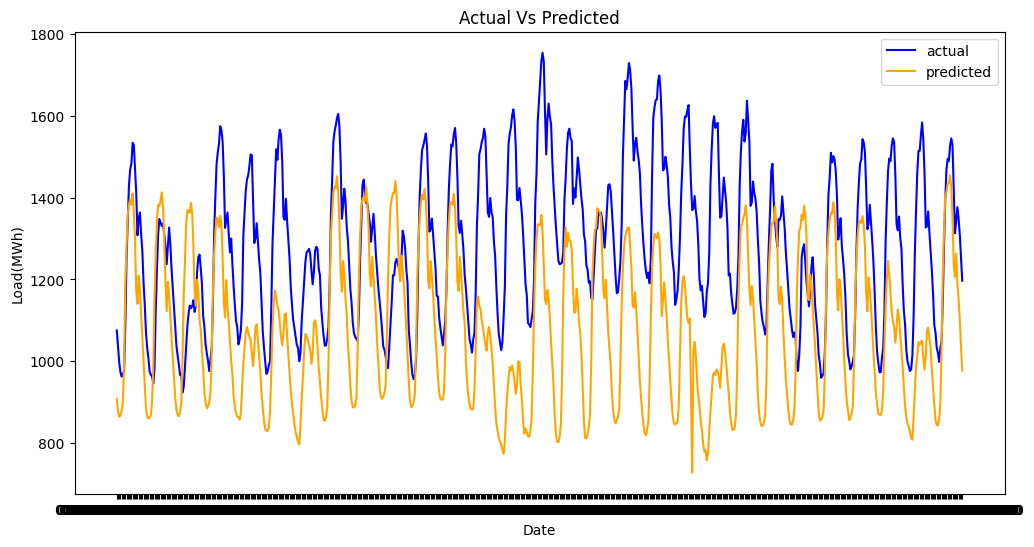

In [ ]:
# sns.lineplot((df_actual['datetime'], df_actual['nat_demand']),color='red')
# sns.lineplot((df_actual['datetime'], df_actual['Pred_nat_demand']))
plt.figure(figsize=(12, 6))
plt.plot(df_actual['datetime'], df_actual['nat_demand'], label='actual', color='blue')
plt.plot(df_actual['datetime'], df_actual['Pred_nat_demand'], label='predicted', color='orange')

plt.title('Actual Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()

In [12]:
data= pd.read_csv('Test1.csv')
# df_test1=data.head(48)

In [8]:
import tensorflow as tf
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph() -> None>

In [6]:
from tensorflow import keras
# save_model=keras.models.load_model("STLF.keras")
# model.save("save_model.h5")

In [4]:
import joblib
scaler = joblib.load('scaler.joblib')

In [13]:
custom_objects = {'mse': keras.losses.MeanSquaredError()}
save_model = keras.models.load_model('STLF2.h5',custom_objects=custom_objects)

In [ ]:

predicted_y=[]
dates=[]
previousData=[]
time=[]
for i in range(24):
  df_test1=data.iloc[i:i+48]
  df_test1['datetime']=pd.to_datetime(df_test1['datetime'],format='%d-%m-%Y %H:%M')

  df_test1['week_day']=df_test1['datetime'].dt.dayofweek
  df_test1['date']=df_test1['datetime'].dt.day
  df_test1['month']=df_test1['datetime'].dt.month
  df_test1['hour']=df_test1['datetime'].dt.hour
  # df.head()
  date=data.iloc[i+48,0]
  date=pd.to_datetime(date,format='%d-%m-%Y %H:%M')
  # time.append(date.dt.time)


  previousData.append(data.iloc[i+48,1])
  df_test2 = add_features(df_test1)

  # df_test1 = add_features(df_test1)
  # print(df_test1.head())
  col=['datetime']
  new_df_test2= df_test2.drop(columns=col)
  df_for_testing1 = new_df_test2.astype(float)
  # print(df_for_testing1)
  # df_for_pred1=df_test1.drop(columns=['datetime'])
  # df_test1=df_for_pred1.astype(float)
  df_pred_scaled1=scaler.transform(df_for_testing1)

  # print(df_pred_scaled1)
  # print(df_test.sha)
  X_pred1 = []
  # for i in range(n_past, len(df_pred_scaled1) - n_future +1):

  X_pred1.append(df_pred_scaled1[0:48, 0:df_for_testing1.shape[1]])


  X_pred1= np.array(X_pred1)
  # print(X_pred1)

  print('X for prediction shape == {}.'.format(X_pred1.shape))
  prediction1 = save_model.predict(X_pred1)
  print(prediction1.shape)
  prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
  # print(prediction1_copies)
  y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
  # print(y_pred_future1)
  predicted_y.append(y_pred_future1)
  dates.append(date)
  data.loc[i+48,'nat_demand']=y_pred_future1



# print(predicted_y)
# clear_output()

In [15]:
time = [ts.time() for ts in dates]


In [16]:
time_str = [str(t) for t in time]

In [47]:
for i, w in enumerate(model.weights): print(i, w.name)

0 kernel
1 recurrent_kernel
2 bias
3 kernel
4 recurrent_kernel
5 bias
6 kernel
7 recurrent_kernel
8 bias
9 kernel
10 recurrent_kernel
11 bias
12 kernel
13 recurrent_kernel
14 bias
15 kernel
16 recurrent_kernel
17 bias
18 kernel
19 bias
20 kernel
21 bias
22 kernel
23 bias
24 kernel
25 bias


In [34]:
for i in range(len(model.weights)):
    model.weights[i].name = model.weights[i].name + "_" + str(i)

In [35]:
model.save("STLF2.h5")

In [43]:
model_json = model.to_json()

# Save the architecture to a JSON file
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [3]:
# model.save("my_model.h5")
y=np.array([[1096.5659179688],[1050.5411376953],[1013.8250732422],[978.5521850586],[952.2857055664],[947.4927368164],[1000.7673339844],[1093.3470458984],[1181.7158203125],[1257.4506835938],[1312.9011230469],[1350.5280761719],[1385.4041748047],[1422.9766845703],[1436.2574462891],[1429.3006591797],[1375.5732421875],[1305.4333496094],[1215.5721435547],[1170.6783447266],[1146.5623779297],[1122.9300537109],[1074.7768554688],[1014.4948120117]])

a=y.flatten()
# y=[1011.2512207031,959.4590454102,914.1406860352,882.2149047852,864.3694458008,865.9040527344,866.945678710,876.5729980469,955.2951660156,1056.306640625,1121.9140625,1144.6456298828,1141.2657470703,1114.2178955078,1077.9423828125,1049.478515625,1014.9116821289,1004.2651367188,1024.0686035156,1018.1025390625,982.8408813477,943.3991088867,904.3211669922,868.7116088867]

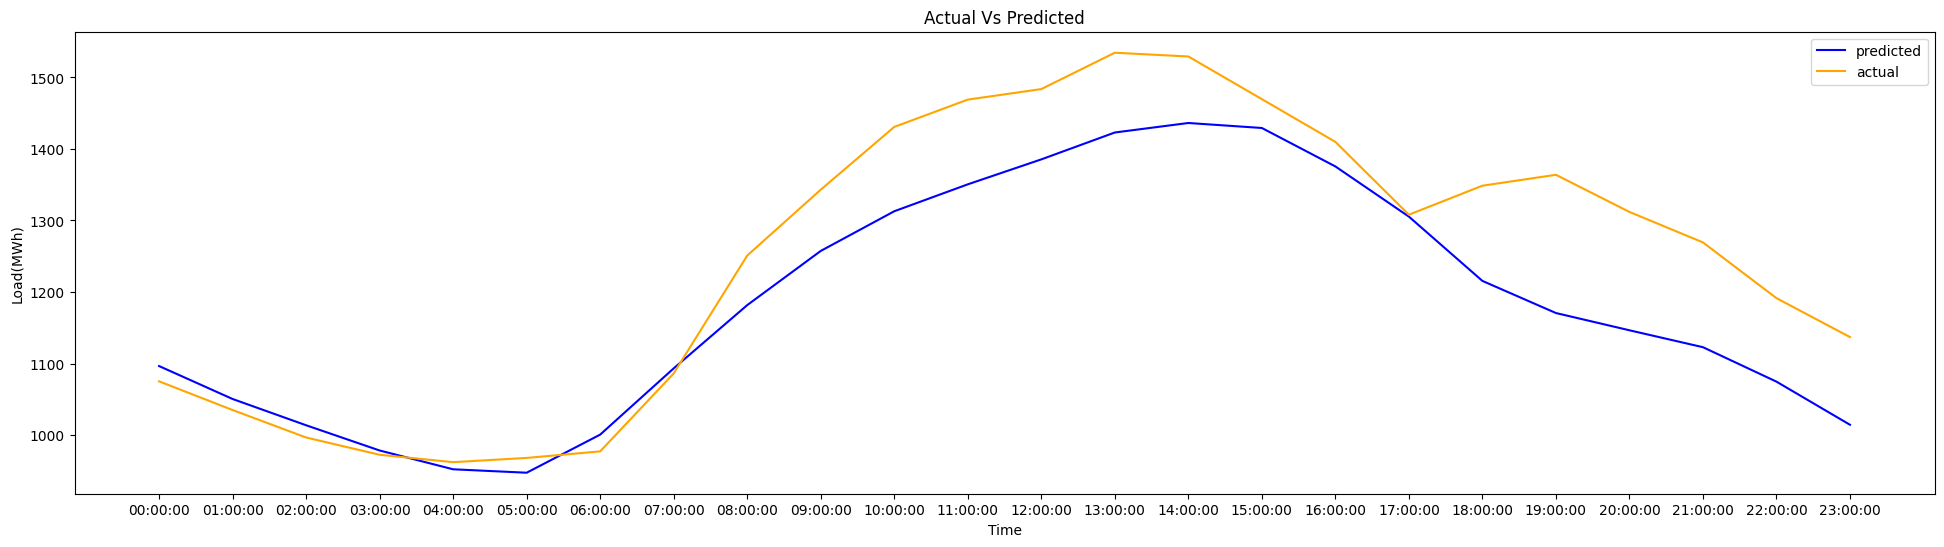

In [18]:
plt.figure(figsize=(24, 6))
plt.plot(time_str, predicted_y, label='predicted', color='blue')
plt.plot(time_str,previousData , label='actual', color='orange')
plt.title('Actual Vs Predicted')
plt.xlabel('Time')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()

In [19]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
trainScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Test Score: %.2f RMSE' % (testScore))

#calculate mean absolute percent error
trainMAPE = mean_absolute_error(predicted_y, previousData)
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(predicted_y, previousData)
print('testMAPE: %.2f MAPE' % testMAPE)

#calculate mean square error
trainmse = mean_squared_error(predicted_y, previousData)
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(predicted_y, previousData)
print('TestMSE: %.2f MSE' % testmse)
trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

# print('train_size',train_size)
# print('test_size',test_size)

Train Score: 93.14 RMSE
Test Score: 93.14 RMSE
trainMAPE: 73.73 MAPE
testMAPE: 73.73 MAPE
TrainMSE: 8675.21 MSE
TestMSE: 8675.21 MSE
trainKPI [73.7339217163086, 93.14083269597263, 8675.214715299166]
testKPI [73.7339217163086, 93.14083269597263, 8675.214715299166]


In [36]:
model.save("model1.hdf5")

ValueError: Unable to synchronously create dataset (name already exists)

In [ ]:
# model.save_weights('shorterm_model_weights.h5')
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder to save in Google Drive
!mkdir /content/drive/MyDrive/my_folder_in_drive

# Copy content to the new Google Drive folder
!cp -r short_term_model//* /content/drive/MyDrive/my_folder_in_drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prediction1 = model.predict(X_pred1)
prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
print(y_pred_future1)

1/1 [==============================] - 0s 45ms/step
[1257.0238]


In [ ]:

df_forecast1=[]
df_forecast1 = pd.DataFrame(y_pred_future1)
temp_df1=[]
temp_df1=pd.DataFrame(np.zeros(n_past))
df_forecast1 =pd.concat([temp_df1,df_forecast1], ignore_index=True)
print(len(df_forecast1))
df_actual1= pd.read_csv('Predict_Jan2.csv',encoding="latin-1")
df_actual1['Pred_nat_demand']=df_forecast1
df_actual1 = df_actual1.iloc[n_past:]
df_actual1
a4_dims = (25,8)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot((df_actual1['datetime'], df_actual1['nat_demand']))
# sns.lineplot((df_actual1['datetime'], df_actual1['Pred_nat_demand']))
print(df_actual1['nat_demand'])
print(df_actual1['Pred_nat_demand'])

2/2 [==============================] - 2s 32ms/step
[25.040491 24.980936 24.967775 25.255363 26.326431 27.327496 27.875158
 28.21409  28.5806   28.844511 28.803537 28.548798 28.119318 27.41792
 26.651976 26.000965 25.763548 25.802904 25.76371  25.600857 25.424494
 25.369764 25.387405 25.33934  25.269083 25.23071  25.254005 25.440985
 26.5655   27.54647  28.194756 28.611116 28.961475 29.101183 29.003763
 28.734112 28.324833 27.692595 27.197754 26.723309 26.41208  26.268808
 26.1622   25.987503 25.81969  25.686487 25.64791  25.642515 25.551455
 25.474188 25.50112  25.68813  26.73153  27.688059 28.41746  28.956429
 29.42287  29.725641 29.779985 29.591515 29.121658 28.208952 25.359177]
111
48     1041.0795
49     1054.0482
50     1075.8888
51     1140.4639
52     1305.2228
         ...    
106    1274.7444
107    1262.0978
108    1222.3197
109    1188.0593
110    1218.8633
Name: nat_demand, Length: 63, dtype: float64
48     25.040491
49     24.980936
50     24.967775
51     25.255363
52   

In [ ]:
df_actual1['date']=pd.to_datetime(df_actual1['datetime'])
df_actual1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 48 to 71
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         24 non-null     object        
 1   nat_demand       24 non-null     float64       
 2   Pred_nat_demand  24 non-null     float64       
 3   date             24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 900.0+ bytes


In [ ]:
df_actual1['time']=df_actual1['date'].dt.time
df_actual1.head()

,datetime,nat_demand,Pred_nat_demand,date,time
48,06-01-2020 00:00,1083.9995,907.714417,2020-06-01 00:00:00,00:00:00
49,06-01-2020 01:00,1040.1826,877.475647,2020-06-01 01:00:00,01:00:00
50,06-01-2020 02:00,1019.1363,864.042603,2020-06-01 02:00:00,02:00:00
51,06-01-2020 03:00,1000.4205,867.328003,2020-06-01 03:00:00,03:00:00
52,06-01-2020 04:00,975.8471,878.924500,2020-06-01 04:00:00,04:00:00


In [ ]:
df_actual1['time'] = df_actual1['time'].astype(str)

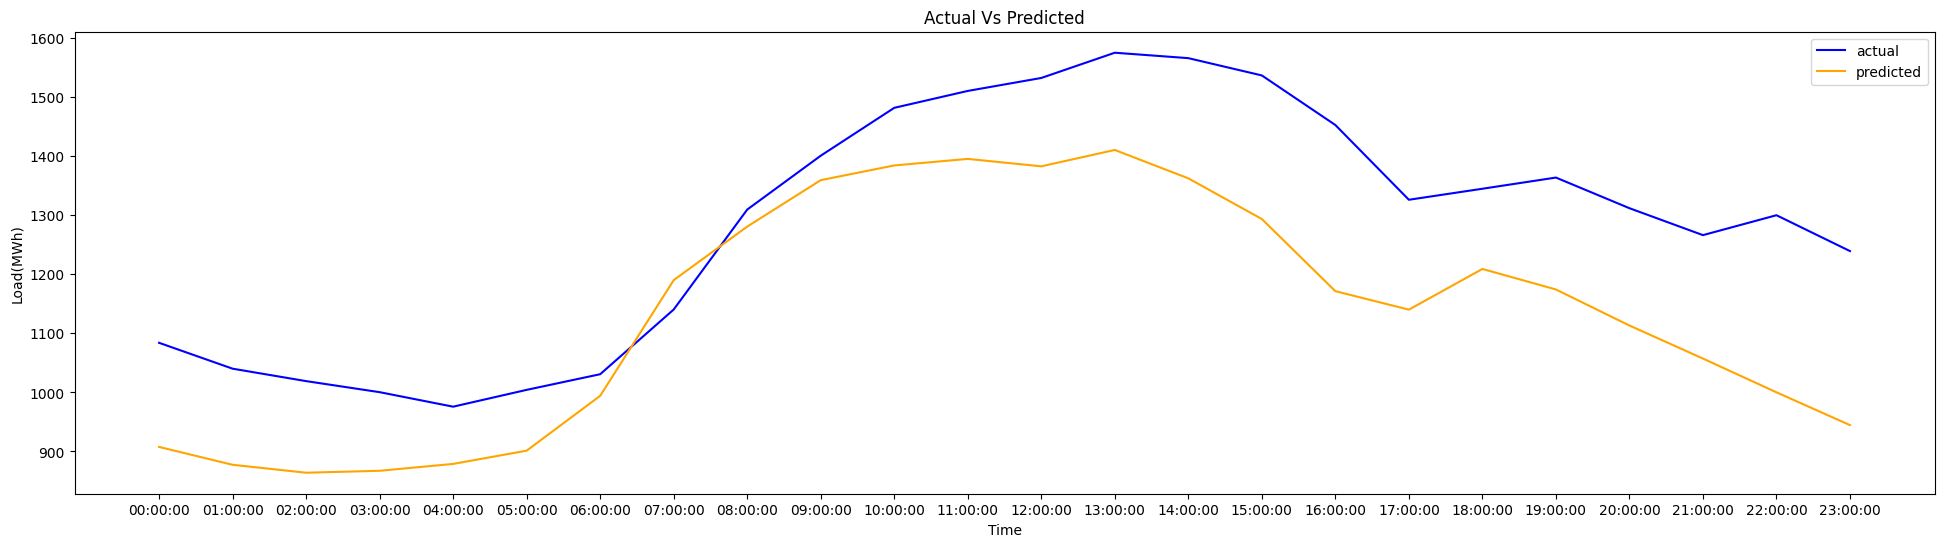

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(df_actual1['time'], df_actual1['nat_demand'], label='actual', color='blue')
plt.plot(df_actual1['time'], df_actual1['Pred_nat_demand'], label='predicted', color='orange')

plt.title('Actual Vs Predicted')
plt.xlabel('Time')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()